# Project 2: Electromagnetic Waves

In this project, we are going to look at the dispersion relation for electromagnetic waves.

The dispersion relation, $\omega(k)$, tells us the natural frequencies of oscillations for these waves, and the information contained in this function about the relationship between $\omega$ and $k$ can be used to determine the phase and group velocities of these waves.  [There will be a subsequent notebook on wave velocities]

For transverse waves have:

* $\nabla \cdot \vec{E} = 0$ -- transverse waves  

* $T_e = 0$                  -- cold plasma  

* $\vec{B}_0 = 0$            -- unmagnetized

From Maxwell's Equations we have:

$$ -\nabla\times\vec{E_1} = \frac{\partial}{\partial t} \vec{B_1}   $$
and
$$ \nabla\times\vec{B_1} = \mu_0\vec{J_1} + \mu_0 \epsilon_0 \frac{\partial}{\partial t}\vec{E_1} $$

Taking the curl of the first equation and substituting into it the second equation, we get:

$$ -\nabla\times\nabla\times\vec{E_1} = \frac{\partial}{\partial t} \nabla\times\vec{B_1} = \frac{\partial}{\partial t}[\mu_0\vec{J_1} + \mu_0 \epsilon_0 \frac{\partial}{\partial t}\vec{E_1}] $$

Since $-\nabla\times\nabla\times\vec{A} = \nabla^2\vec{A} - \nabla(\nabla \cdot\vec{A})$, we have

$$ \nabla^2\vec{E_1} - \frac{1}{c^2}\frac{\partial^2}{\partial t^2}\vec{E_1} - \nabla(\nabla \cdot\vec{E_1}) = \mu_0\frac{\partial}{\partial t}\vec{J_1} $$

For transverse waves, $ \nabla \cdot\vec{E_1} = 0 $, so

\begin{align*}
    \nabla^2\vec{E_1} - \frac{1}{c^2}\frac{\partial^2}{\partial t^2}\vec{E_1} 
    & = \mu_0 \frac{\partial}{\partial t}\vec{J_1} \\
    & = \mu_0 e n_0 \frac{\partial}{\partial t}[\vec{v_i}-\vec{v_e}] \\
    & = \mu_0 e \Big[\frac{e}{M}\vec{E_1} + \frac{e}{m}\vec{E_1}\Big]\frac{\epsilon_0}{\epsilon_0} \\
    & = \mu_0 \epsilon_0 \Big[\frac{e^2 n_0}{\epsilon_0 M} + \frac{e^2 n_0}{\epsilon_0  m}\Big]\vec{E_1}
\end{align*}

Where in the third line we used Euler's equations.  Plugging in our definitions for $\Omega_p$ and $\omega_p$ and moving everything to the left hand side, we finally have 

$$ \nabla^2\vec{E_1} - \frac{1}{c^2}\frac{\partial^2}{\partial t^2}\vec{E_1} - \frac{1}{c^2} [\Omega_p^2 + \omega_p^2] \vec{E} = 0 . $$

Note as in longitudinal waves in cold unmagnetized plasmas the term $[\Omega_p^2 + \omega_p^2]$ appears.  As before, we note that this is a high frequency wave and hence approximate the ions as fixed due to their large mass, hence $[\Omega_p^2 + \omega_p^2] \simeq \omega_p^2$, and we write the above equation as

$$ \nabla^2\vec{E_1} - \frac{1}{c^2}\frac{\partial^2}{\partial t^2}\vec{E_1} - \frac{1}{c^2} [\omega_p^2] \vec{E} = 0 $$


Next, assuming $\vec{E} = \vec{\bar{E}} e^{i(\vec{k} \cdot \vec{x} - \omega t)} $, we finally obtain

$$ \Big[-k^2 + \frac{\omega}{c^2} - \frac{\omega_p^2}{c^2}\Big] \vec{\bar{E}} e^{i(\vec{k} \cdot \vec{x} - \omega t)} = 0 $$

$$\Rightarrow \omega^2 = \omega_p^2 + c^2k^2,$$

the dispersion relation for an electromagnetic wave in an unmagentized plasma!  

It is plotted below.

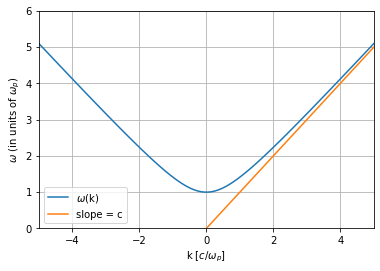

In [2]:
# Plotting w(k) for electromagnetic waves
import ipywidgets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def emdisp(wp):
    N = 5
    k = np.linspace(-N,N,N*20)
    c = 1
    w = np.sqrt(wp**2 + c**2 * k**2)
    cline = k
    plt.plot(k,w, label='$\omega$(k)')
    plt.plot(k,cline, label='slope = c')
    plt.xlabel('k [$c/\omega_p$]')
    plt.ylabel('$\omega$ (in units of $\omega_p$)')
    plt.xlim(-N,N)
    plt.ylim(0,N+1)
    plt.grid(b=True, which='major', axis='both')
    plt.legend(loc=0)
    plt.show()
    
ipywidgets.interact(emdisp,wp=(0.0,2.0),continuous_update=True);

A couple of things to note about this plot:

* recalling expressions for phase velocity, $v_{\phi}=\omega/k$, and group velocity, $v_g = \frac{d\omega}{dk}$ we obtain
$$ v_g = c\sqrt{1-\omega_p^2/\omega^2} $$
$$ v_{\phi} = c / \sqrt{1-\omega_p^2/\omega^2} $$

* Comparing this with the plot, confirm that indeed $v_g = 0$ for $k = 0$, and that $v_g \rightarrow c$ as $k \rightarrow \infty$.  Importantly, although $v_{\phi} > c$, we have $v_g < c$.  Thus special relativity is not violated, since information can only propagate at the group velocity and not at the phase velocity. 

* Also note, if $\omega < \omega_p$ a wave cannot propogate since $k$ becomes imaginary and we get an evanescent wave.  


# Simulations with a Particle-in-Cell Code

In this project you simulate plasmas with exactly the same conditions as in Project 1a.

Each plasma electron is initialized with positions (only in $x$ or what we call $x_1$) such that the density is uniform. The ions are initialized at the same positions but they have an infinite mass.  Each electron is also initialized with velocities ($v_1$, $v_2$, $v_3$) or momentum ($mv_1$, $mv_2$, $mv_3$) from a Maxwellian in each direction. The particles then begin to move in the self-consistent fields that their current and charge density produce.

* The length of the plasmas is 50 $c/\omega_p$
* The simulation will run for a time 400 $1/\omega_p$.
* The simulation uses 50,000 particles.

You will be looking at plots of the electric field in the $x_3$ direction, $E_3$.  In Project 1a you plotted $E_1$.

### The following lines must always be executed before running anything else.

Reminder: Hit Shift+Enter to run a cell, or select the cell and click on the "Run" button in the top menu bar

In [3]:
import sys
sys.path.append("../../analysis/")
import osiris
%matplotlib inline

## Run a case in which $vth_1=vth_2=vth_3=0.02 c$.

In [4]:
# vth/c = 0.02
dirname = 'v02'
osiris.runosiris(rundir=dirname,inputfile='v02.txt')

runosiris completed normally


After the simulation is finished, plot $E_3(x_1)$ at $t \approx 100$ (run the next cell). 
* Do you see any evidence of an electromagnetic wave? 
* Does the plot make sense?

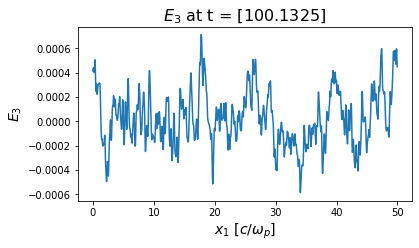

In [5]:
dirname = 'v02'
osiris.field(rundir=dirname, dataset='e3', time=100)

Next, plot $E_3(t)$ at $x_1=5 c/\omega_p$ (i.e., at cell=100). 
* Do you see any evidence of an electromagnetic wave? 
* Does the plot make sense?

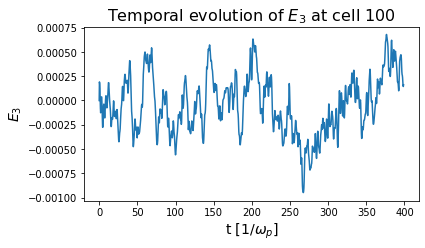

In [6]:
dirname = 'v02'
osiris.field(rundir=dirname, dataset='e3', space=100)

Next, in the following two cells, we are going to plot $\omega(k)$.  This is generated by taking $E_3(x_1,t)$ and Fourier analyzing in both position and time.

-------
* $\omega(k)$ with wavenumber in units of [k] = $\omega_{pe}/c$: 

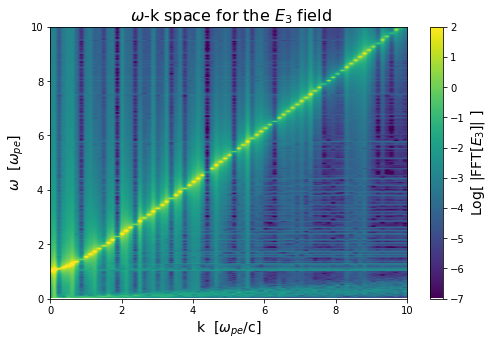

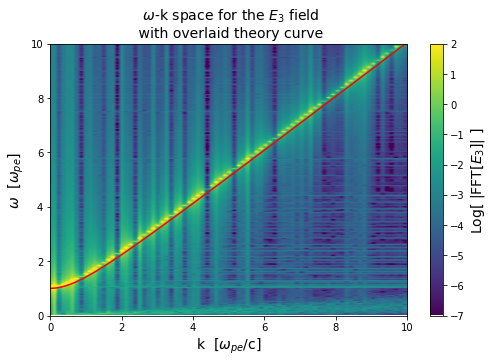

In [7]:
dirname = 'v02'
osiris.plot_wk(rundir=dirname, wlim=[0,10], klim=[0,10], vth = 0.02, vmin=-7, vmax=2, plot_or=3) 
osiris.plot_wk(rundir=dirname, wlim=[0,10], klim=[0,10], vth = 0.02, vmin=-7, vmax=2, plot_or=3, show_theory=True) 

-------
* $\omega(k)$ with wavenumber in units of [k] = $\lambda_{De}$: 

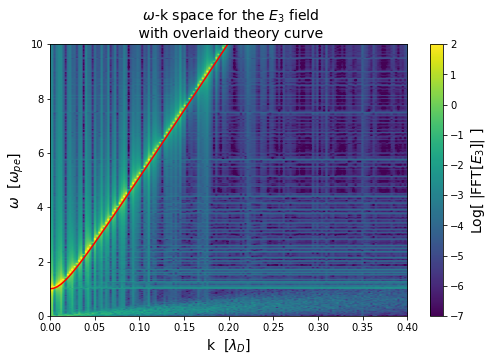

In [8]:
dirname = 'v02'
osiris.plot_wk(rundir=dirname, wlim=[0,10], klim=[0,0.4], vth = 0.02, vmin=-7, vmax=2, show_theory=True, 
               debye=True, plot_or=3) 

I would like you to think about units:
* What do you think are the natural units for $\omega$? 
* What about k? 

We are plotting them in what are called normalized units (not inverse time or inverse distance). We use two choices ($\omega/\omega_p$ and $kc/\omega_p$) and ($\omega/\omega_p$ and $kv_{th}/\omega_p = k\lambda_D$).

We also plot the theory curve:
* Does it make sense? 
* Why do you think it agrees better for all wavenumber than did the plot in Project 1a whichw as for Bohm-Gross waves?

## Run a case in which $vth_1=vth_2=vth_3=0.05 c$.

In [ ]:
# vth/c = 0.05
dirname = 'v05'
osiris.runosiris(rundir=dirname,inputfile='v05.txt')

Make $\omega(k)$ plots for this case by running the cells below.

* $\omega(k)$ with wavenumber in units of [k] = $\omega_{pe}/c$: 

In [ ]:
dirname = 'v05'
osiris.plot_wk(rundir=dirname, wlim=[0,10], klim=[0,10], vth = 0.05, vmin=-7, vmax=2, plot_or=3) 
osiris.plot_wk(rundir=dirname, wlim=[0,10], klim=[0,10], vth = 0.05, vmin=-7, vmax=2, plot_or=3, show_theory=True) 

-------
* $\omega(k)$ with wavenumber in units of [k] = $\lambda_{De}$: 

In [ ]:
dirname = 'v05'
osiris.plot_wk(rundir=dirname, wlim=[0,10], klim=[0,0.4], vth = 0.05, vmin=-7, vmax=2, show_theory=True, 
               plot_or=3, debye=True) 

### Questions
* Do the $\omega(k)$ plots make sense? 
* For which normalized units do the plots look similar to case b?

## Run a case in which $vth_1=vth_2=vth_3=0.20 c$.

In [ ]:
# vth/c = 0.2
dirname = 'v20'
osiris.runosiris(rundir=dirname,inputfile='v20.txt')

Make $\omega(k)$ plots for this case by running the cells below.

* $\omega(k)$ with wavenumber in units of [k] = $\omega_{pe}/c$: 

In [ ]:
dirname = 'v20'
osiris.plot_wk(rundir=dirname, wlim=[0,10], klim=[0,10], vth = 0.20, vmin=-5, vmax=4, plot_or=3) 
osiris.plot_wk(rundir=dirname, wlim=[0,10], klim=[0,10], vth = 0.20, vmin=-5, vmax=4, plot_or=3, show_theory=True) 

-------
* $\omega(k)$ with wavenumber in units of [k] = $\lambda_{De}$: 

In [ ]:
dirname = 'v20'
osiris.plot_wk(rundir=dirname, wlim=[0,10], klim=[0,0.4], vth = 0.20, vmin=-5, vmax=4, show_theory=True, plot_or=3, debye=True)

### Questions

* Do the $\omega(k)$ plots make sense? 

* For which normalized units do the plots look similar to case a and b?

* Look closely at $k=0$. The frequency does not agree with theory as well as for cases a and b. 
 * Is it higher or lower than theory? 
 * Can you think of a reason why?
 * Does the agreement with the theory depend much the temperature? Can you justify your answer using some equations?